# visualization
> 用来进行可视化的部分

In [ ]:
#| default_exp visualization

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
from wcpdtoolbox.imports import *
from plotly import graph_objects as go

In [ ]:
from fastai.test_utils import *

## Callback

In [ ]:
#| export
class GradShowCallback(Callback):
    def __init__(self,l=None, show=True):
        self.grad_list = L() if l is None else l
        self.show = show
    def before_step(self):
        grads = []
        for i in self.learn.model.parameters():
            if not i.grad is None:
                grads.append(to_detach(i.grad.abs().mean()))
            else:
                grads.append(tensor(0.))
        self.grad_list.append(grads)
    
    def after_fit(self):
        if not self.show:
            return
        fig = go.Figure()
        name = [name for name, _ in self.learn.model.named_parameters()]
        arr = array(self.grad_list).T
        x = np.arange(len(self.grad_list))
        for a,n in zip(arr, name):
            fig.add_trace(go.Scatter(x=x, y=a, name=n))
        fig.show()

显示各层的grad曲线
```python
grad.abs().mean()
```

In [ ]:
def get_pets_dataloaders(len_items=800, randomseed=42, item_tfms_size=460, batch_tfms_size=460, batch_tfms_min_scale=0.75, **kwarg):
    path = untar_data(URLs.PETS)
    pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                     get_items=(lambda x:get_image_files(x)[:len_items]), 
                     splitter=RandomSplitter(seed=randomseed),
                     get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                     item_tfms=Resize(item_tfms_size),
                     batch_tfms=aug_transforms(size=batch_tfms_size, min_scale=batch_tfms_min_scale))
    dls = pets.dataloaders(path/"images", **kwarg)
    return dls

In [ ]:
dls = get_pets_dataloaders()

In [ ]:
learner = vision_learner(dls, resnet18)

/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.



In [ ]:
l = L()

epoch,train_loss,valid_loss,time
0,0.133676,0.263481,00:07


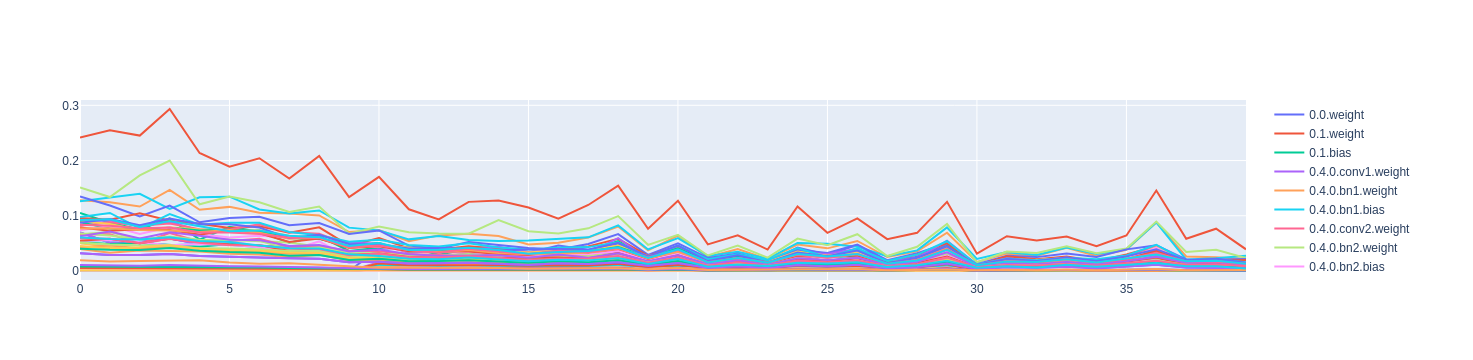

epoch,train_loss,valid_loss,time
0,0.118141,0.295313,00:10
1,0.103426,0.179227,00:10
2,0.086377,0.191343,00:10


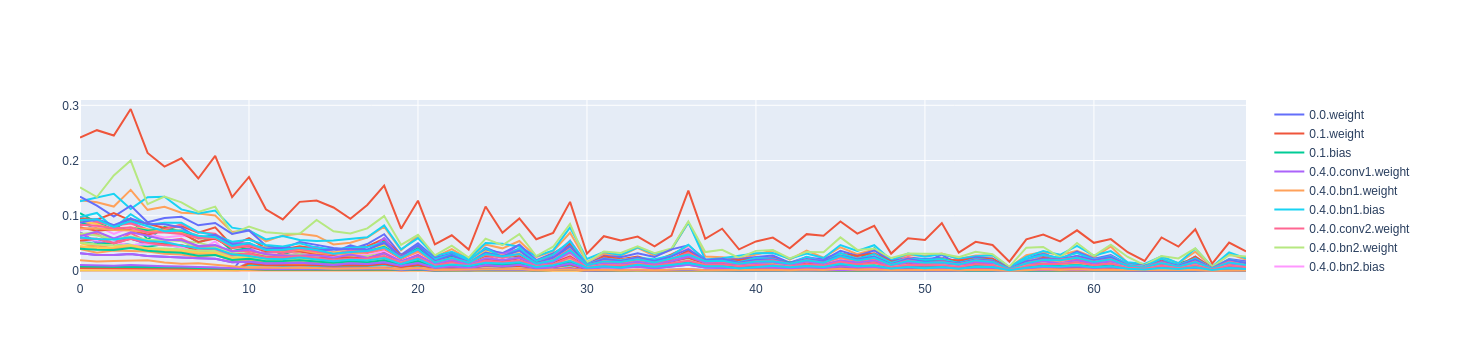

In [ ]:
learner.fine_tune(3, cbs=GradShowCallback(l))

In [ ]:
len(l)

70

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()